Необходимо отметить, что данное задание вызвало у меня кучу вопросов и заставило потерять еще пару недель (так как очень трудно заставить себя выполнять то, что вообще непонятно с точки зрения "куда лошадей запрягать", хотя учебный материал модуля вопросов не вызывал). То есть опять (кстати как и в модуле по рекомендательным системам, где я месяц разбирался, что же автор задания подразумевал под словом "чек") изучали одно, а проект в основном про другое. Возможно для человека погруженного в подобные задачи все ясно, но на мой взгляд некоторые важные детали в материалах упущены. Дали бы хотя бы пример расчета метрик и куча вопросов отвалилась бы (а точнее даже не появилась бы). Одна фраза  "нет ли проблемы с разъезжанием сплитов" чего стоит... Ну да, если я не высыпаюсь и работаю на двух работах, то просто нет лишних сил на попытку понять, что же хотел сказать автор задания с помощью данной аллегории, которую естественно раньше не использовал в учебном материале. А это мистическое: "тест равенства долей для A и C групп по всем метрикам". Долей чего? Где-то упоминались "доли"? Все это дико сбивает студента и раздражает.. Тест Шапиро-Уилка - опять же не появляется нигде в учебном материале.. При этом в материале от учи.ru предлагается использовать критерий стьюдента независимо от нормальности распределения (лишь бы выборочные средние нормально распределены), зачем тогда здесь его проводить ? Ничего сложного, можно и самим почитать )) но причем здесь тогда этот курс?) В итоге прочитаный материал почти никак не помог с работой над этим заданием...

In [2]:
import pandas as pd
import numpy as np


df = {}

In [3]:
for s in ['a', 'b', 'c']:

    df[s] = pd.read_csv(f"sample_{s}.csv")
    print(f'Размер датасета {s}:', df[s].shape)
    display(df[s].head())

Размер датасета a: (1188912, 3)


,user_id,item_id,action_id
0,84636,360,1
1,21217,9635,1
2,13445,8590,1
3,38450,5585,1
4,14160,2383,0


Размер датасета b: (1198438, 3)


,user_id,item_id,action_id
0,118375,4105,1
1,107569,8204,1
2,175990,880,1
3,160582,9568,0
4,123400,4000,1


Размер датасета c: (1205510, 3)


,user_id,item_id,action_id
0,274623,2863,1
1,265472,343,1
2,242779,6009,0
3,275009,2184,1
4,268104,3134,2


In [4]:
# Есть ли дубли? (спойлер: их нет)
for s in ['a', 'b', 'c']:
    print(s, sum(df[s].duplicated()))

a 0
b 0
c 0


In [5]:
df['a'].action_id.value_counts()

1    951130
0    190226
2     47556
Name: action_id, dtype: int64

In [6]:
df['c'].action_id.value_counts()

1    949221
0    199336
2     56953
Name: action_id, dtype: int64

In [7]:
df['b'].action_id.value_counts()

1    951141
0    152183
2     95114
Name: action_id, dtype: int64

In [8]:
df['a'].groupby(['user_id', 'item_id'])['action_id'].sum().value_counts()

1    903574
3     47556
Name: action_id, dtype: int64

In [9]:
df['b'].groupby(['user_id', 'item_id'])['action_id'].sum().value_counts()

1    856027
3     95114
Name: action_id, dtype: int64

In [10]:
df['c'].groupby(['user_id', 'item_id'])['action_id'].sum().value_counts()

1    892268
3     56953
Name: action_id, dtype: int64

#### Итак, дублей нет. 
#### Проверка, что нет ситуаций, когда происходит покупка 2/клик 0 без действия просмотра 1 проведена.
#### Расчитаем метрики:

In [11]:
# Получим метрики для каждого датасета
ctr = {}
purchase_rate = {}
gvm = {}

In [12]:
for s in ['a', 'b', 'c']:
    ctr[s] = round(sum(df[s]['action_id'] == 0) /
                   sum(df[s]['action_id'] == 1)*100)
    print(f'{s} ctr', ctr[s])

a ctr 20
b ctr 16
c ctr 21


In [13]:
for s in ['a', 'b', 'c']:
    purchase_rate[s] = round(
        sum(df[s]['action_id'] == 2)/sum(df[s]['action_id'] == 1)*100)
    print(f'{s} purchase', purchase_rate[s])

a purchase 5
b purchase 10
c purchase 6


In [14]:
dfp = pd.read_csv("item_prices.csv")
dfp[dfp.item_id.duplicated()].sort_values('item_id').count()

item_id       45
item_price    45
dtype: int64

In [15]:
# один товар имеет несколько цен, уберем дубли оставив последний

In [16]:
dfp = dfp.drop_duplicates(subset=['item_id'], keep='last')
dfp = dfp.set_index('item_id')
dfp.head()

,item_price
item_id,
74,647
7696,825
866,875
5876,804
153,1969


In [17]:
grp = {}
for s in ['a', 'b', 'c']:
    grp[s] = df[s][df[s]['action_id'] == 2].groupby('item_id').count()
    grp[s] = grp[s].drop(columns=['action_id'])
    grp[s] = grp[s].rename(columns={'user_id': 'purchase_num'})
    display(
        f'Количества покупок каждого товара в  датасете {s}', grp[s].head())

'Количества покупок каждого товара в  датасете a'

,purchase_num
item_id,
21,50
36,45
39,44
50,59
64,61


'Количества покупок каждого товара в  датасете b'

,purchase_num
item_id,
21,105
36,93
39,115
50,100
64,94


'Количества покупок каждого товара в  датасете c'

,purchase_num
item_id,
21,56
36,59
39,54
50,53
64,78


In [18]:
# Добавим столбец с ценой, получим произведения и рассчитаем gvm
grp_p = {}
for s in ['a', 'b', 'c']:
    grp_p[s] = grp[s].join(dfp)
    grp_p[s]['amount'] = grp_p[s]['purchase_num']*grp_p[s]['item_price']
    gvm[s] = grp_p[s]['amount'].sum()
    display(grp_p[s].head())
    print(f'{s} gvm:', gvm[s])

,purchase_num,item_price,amount
item_id,,,
21,50,452,22600
36,45,282,12690
39,44,1746,76824
50,59,871,51389
64,61,1479,90219


a gvm: 51183991


,purchase_num,item_price,amount
item_id,,,
21,105,452,47460
36,93,282,26226
39,115,1746,200790
50,100,871,87100
64,94,1479,139026


b gvm: 102261317


,purchase_num,item_price,amount
item_id,,,
21,56,452,25312
36,59,282,16638
39,54,1746,94284
50,53,871,46163
64,78,1479,115362


c gvm: 61236564


#### Сравним метрики по группам:

In [19]:
pd.DataFrame([ctr, purchase_rate, gvm], index=[
             'ctr %', 'purchase_rate %', 'gvm'])

,a,b,c
ctr %,20,16,21
purchase_rate %,5,10,6
gvm,51183991,102261317,61236564


#### Очевидно, метрики групп 'a' и 'c' значительно билже друг к другу чем к метрикам группы 'b', хотя и немного различаются.
Указанные выше метрики расчитаны были по всему датасету (насколько мне это было понятно из формулировки задания), что возможно и неверно при существенных различиях между объектами (пользователями) внутри самих датасетов. К тому же эти величины не дают представлений об их распределениях по пользователям. Поэтому расчитаем метрики по каждому пользователю, а потом можно будет посмотреть уже и на параметры получившихся распределений.

'Значения метрики ctr в  датасете a'

,impressions_num,clicks_num,ctr
user_id,,,
241,955,179,0.187435
253,955,192,0.201047
362,955,178,0.186387
378,955,195,0.204188
475,955,197,0.206283


mean of ctr for dataset a: 0.20000012209394488


'Значения метрики ctr в  датасете b'

,impressions_num,clicks_num,ctr
user_id,,,
100038,955,167,0.174869
100099,955,161,0.168586
100164,955,140,0.146597
100321,955,180,0.188482
100397,955,153,0.160209


mean of ctr for dataset b: 0.16000045859861273


'Значения метрики ctr в  датасете c'

,impressions_num,clicks_num,ctr
user_id,,,
200225,955,196,0.205236
200278,955,203,0.212565
200282,955,209,0.218848
200325,955,185,0.193717
200441,954,202,0.211740


mean of ctr for dataset c: 0.20999951822271418


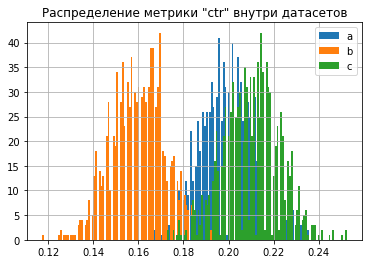

In [54]:
# Получим распределение метрики ctr по датасетам
ctr_ = {}
for s in ['a', 'b', 'c']:
    tmp0 = df[s][df[s]['action_id'] == 0].groupby('user_id').count()
    tmp1 = df[s][df[s]['action_id'] == 1].groupby('user_id').count()
    tmp0 = tmp0.drop(columns=['action_id'])
    tmp0 = tmp0.rename(columns={'item_id': 'clicks_num'})
    tmp1 = tmp1.drop(columns=['action_id'])
    tmp1 = tmp1.rename(columns={'item_id': 'impressions_num'})
    ctr_[s] = tmp1.join(tmp0)
    ctr_[s]['ctr'] = ctr_[s].clicks_num/ctr_[s].impressions_num
    ctr[s] = round(ctr_[s]['ctr'].mean(), 3)
    ax = ctr_[s]['ctr'].hist(bins=100, label=s)
    ax.legend()
    ax.set_title('Распределение метрики "ctr" внутри датасетов')
    display(f'Значения метрики ctr в  датасете {s}', ctr_[s].head())
    print(f'mean of ctr for dataset {s}:', ctr_[s]['ctr'].mean())

'Значения метрики purchase_rate в  датасете a'

,impressions_num,clicks_num,purchase_rate
user_id,,,
241,955,47,0.049215
253,955,37,0.038743
362,955,50,0.052356
378,955,51,0.053403
475,955,50,0.052356


mean of purchase_rate for dataset a: 0.04999952636328587


'Значения метрики purchase_rate в  датасете b'

,impressions_num,clicks_num,purchase_rate
user_id,,,
100038,955,100,0.104712
100099,955,119,0.124607
100164,955,98,0.102618
100321,955,96,0.100524
100397,955,81,0.084817


mean of purchase_rate for dataset b: 0.09999986464598486


'Значения метрики purchase_rate в  датасете c'

,impressions_num,clicks_num,purchase_rate
user_id,,,
200225,955,49,0.051309
200278,955,58,0.060733
200282,955,70,0.073298
200325,955,44,0.046073
200441,954,49,0.051363


mean of purchase_rate for dataset c: 0.05999975370440444


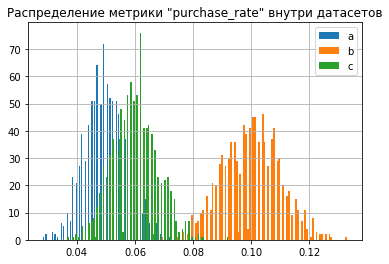

In [55]:
# Получим распределение метрики purchase_rate по датасетам
purchase_rate_ = {}
for s in ['a', 'b', 'c']:
    tmp2 = df[s][df[s]['action_id'] == 2].groupby('user_id').count()
    tmp1 = df[s][df[s]['action_id'] == 1].groupby('user_id').count()
    tmp2 = tmp2.drop(columns=['action_id'])
    tmp2 = tmp2.rename(columns={'item_id': 'clicks_num'})
    tmp1 = tmp1.drop(columns=['action_id'])
    tmp1 = tmp1.rename(columns={'item_id': 'impressions_num'})
    purchase_rate_[s] = tmp1.join(tmp2)
    purchase_rate_[s]['purchase_rate'] = purchase_rate_[
        s].clicks_num/purchase_rate_[s].impressions_num
    purchase_rate[s] = round(purchase_rate_[s]['purchase_rate'].mean(), 3)

    ax = purchase_rate_[s]['purchase_rate'].hist(bins=100, label=s)
    ax.legend()
    ax.set_title('Распределение метрики "purchase_rate" внутри датасетов')
    display(
        f'Значения метрики purchase_rate в  датасете {s}', purchase_rate_[s].head())
    print(f'mean of purchase_rate for dataset {s}:', purchase_rate_[
          s]['purchase_rate'].mean())

mean of gvm for dataset a: 51389.54919678715
mean of gvm for dataset b: 102672.00502008032
mean of gvm for dataset c: 61606.20120724346


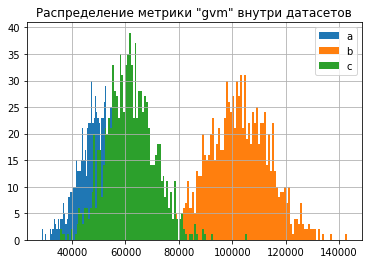

In [56]:
# Получим распределение метрики gvm по датасетам
gvm_ = {}
for s in ['a', 'b', 'c']:
    tmp = df[s].join(dfp, on='item_id')
#     display(s, tmp.head())
    gvm_[s] = tmp[tmp.action_id == 2].groupby('user_id')['item_price'].sum()
    gvm[s] = round(gvm_[s].mean(), 3)
    print(f'mean of gvm for dataset {s}:', gvm_[s].mean())
    ax = gvm_[s].hist(bins=100, label=s)
    ax.legend()
    ax.set_title('Распределение метрики "gvm" внутри датасетов')

#### Сравним метрики (а вернее их средние по всем пользователям) между группами:

In [57]:
pd.DataFrame([ctr, purchase_rate, gvm], index=['ctr', 'purchase_rate', 'gvm'])

,a,b,c
ctr,0.200,0.160,0.210
purchase_rate,0.050,0.100,0.060
gvm,51389.549,102672.005,61606.201


Мне повезло с похожестью пользователей внутри групп: усредненные по пользователям метрики оказались идентичными метрикам рассчитанным по всему датасету.
#### Очевидно, метрики групп 'a' и 'c' значительно билже друг к другу чем к метрикам группы 'b', хотя и не равны друг другу.

In [58]:
from scipy.stats import shapiro, ttest_ind

In [59]:
def shapiro_wilk_test(data, alpha=0.05):
    # normality test
    stat, p = shapiro(data)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')
    return p


for s in ['a', 'b', 'c']:
    print(f'Normality test for "ctr" metric for group "{s}".')
    shapiro_wilk_test(ctr_[s]['ctr'], alpha=0.01)
    print(' ')
for s in ['a', 'b', 'c']:
    print(f'Normality test for "purchase_rate" metric for group "{s}".')
    shapiro_wilk_test(purchase_rate_[s]['purchase_rate'], alpha=0.01)
    print(' ')
for s in ['a', 'b', 'c']:
    print(f'Normality test for "gvm" metric for group "{s}".')
    shapiro_wilk_test(gvm_[s], alpha=0.01)
    print(' ')

Normality test for "ctr" metric for group "a".
Statistics=0.996, p=0.025
Sample looks Gaussian (fail to reject H0)
 
Normality test for "ctr" metric for group "b".
Statistics=0.998, p=0.332
Sample looks Gaussian (fail to reject H0)
 
Normality test for "ctr" metric for group "c".
Statistics=0.998, p=0.171
Sample looks Gaussian (fail to reject H0)
 
Normality test for "purchase_rate" metric for group "a".
Statistics=0.996, p=0.006
Sample does not look Gaussian (reject H0)
 
Normality test for "purchase_rate" metric for group "b".
Statistics=0.998, p=0.233
Sample looks Gaussian (fail to reject H0)
 
Normality test for "purchase_rate" metric for group "c".
Statistics=0.996, p=0.023
Sample looks Gaussian (fail to reject H0)
 
Normality test for "gvm" metric for group "a".
Statistics=0.997, p=0.043
Sample looks Gaussian (fail to reject H0)
 
Normality test for "gvm" metric for group "b".
Statistics=0.999, p=0.681
Sample looks Gaussian (fail to reject H0)
 
Normality test for "gvm" metric fo

В целом почти все метрики распределены нормально. Проведем тесты гипотез на равенство выборок метрик между группами.

In [74]:
# Student's t-test
from scipy.stats import ttest_ind


def t_test(data1, data2, alpha=0.05):

    # compare samples
    stat, p = ttest_ind(data1, data2)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    if p > alpha:
        print('Same distributions (fail to reject H0)')
    else:
        print('Different distributions (reject H0)')


print('тест на равенство метрики "ctr" между группами "a" и "с"')
t_test(ctr_['c']['ctr'], ctr_['a']['ctr'])
print(' ')
print('тест на равенство метрики "purchase_rate" между группами "a" и "с"')
t_test(purchase_rate_['c']['purchase_rate'],
       purchase_rate_['a']['purchase_rate'])
print(' ')
print('тест на равенство метрики gvm" между группами "a" и "с"')
t_test(gvm_['c'], gvm_['a'])

тест на равенство метрики "ctr" между группами "a" и "с"
Statistics=17.443, p=0.000
Different distributions (reject H0)
 
тест на равенство метрики "purchase_rate" между группами "a" и "с"
Statistics=29.990, p=0.000
Different distributions (reject H0)
 
тест на равенство метрики gvm" между группами "a" и "с"
Statistics=26.320, p=0.000
Different distributions (reject H0)


#### Результаты A/A теста оказались неутешительными, где-то что-то сработало не так или юзеры были неправильно отобраны и метрики не прошли гипотезу о равенстве  в группах a и c. Видимо это и имелось ввиду под термином "разъезжание сплитов"...

In [77]:
print('тест на равенство метрики "ctr" между группами "a" и "b"')
t_test(ctr_['b']['ctr'], ctr_['a']['ctr'])
print(' ')
print('тест на равенство метрики "purchase_rate" между группами "a" и "b"')
t_test(purchase_rate_['b']['purchase_rate'],
       purchase_rate_['a']['purchase_rate'])
print(' ')
print('тест на равенство метрики gvm" между группами "a" и "b"')
t_test(gvm_['b'], gvm_['a'])

тест на равенство метрики "ctr" между группами "a" и "b"
Statistics=-70.752, p=0.000
Different distributions (reject H0)
 
тест на равенство метрики "purchase_rate" между группами "a" и "b"
Statistics=130.251, p=0.000
Different distributions (reject H0)
 
тест на равенство метрики gvm" между группами "a" и "b"
Statistics=115.508, p=0.000
Different distributions (reject H0)


In [79]:
print('тест на равенство метрики "ctr" между группами "с" и "b"')
t_test(ctr_['b']['ctr'], ctr_['c']['ctr'])
print(' ')
print('тест на равенство метрики "purchase_rate" между группами "с" и "b"')
t_test(purchase_rate_['b']['purchase_rate'],
       purchase_rate_['c']['purchase_rate'])
print(' ')
print('тест на равенство метрики gvm" между группами "с" и "b"')
t_test(gvm_['b'], gvm_['c'])

тест на равенство метрики "ctr" между группами "с" и "b"
Statistics=-90.106, p=0.000
Different distributions (reject H0)
 
тест на равенство метрики "purchase_rate" между группами "с" и "b"
Statistics=101.146, p=0.000
Different distributions (reject H0)
 
тест на равенство метрики gvm" между группами "с" и "b"
Statistics=89.387, p=0.000
Different distributions (reject H0)


#### Тем не менее различия между группами a и b, а также между c и b очень существенные (видны как на гистограммах, так и по значениям статистик) даже с учетом "провального" A/A теста. На мой взгляд алгоритм B даже очень улучшает работу маркетплейса.